# Convolutional Neural Networks (CNN) on letters images

Github: ciro-c

Lesson 7 - Student 190011611

This notebook purpose its to create a CNN to identify handwriten individual letters, the dataset used is [Here](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format)

In [214]:
#Importing library
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from tensorflow.keras import datasets, layers, models, Model, preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D

dataPath = "../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv"

## Importing and visualizing our data

In [18]:
letters = pd.read_csv(dataPath)
letters.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 The data is not in a img format, só lets change that so we can see it better

The folder './formated' already exists.


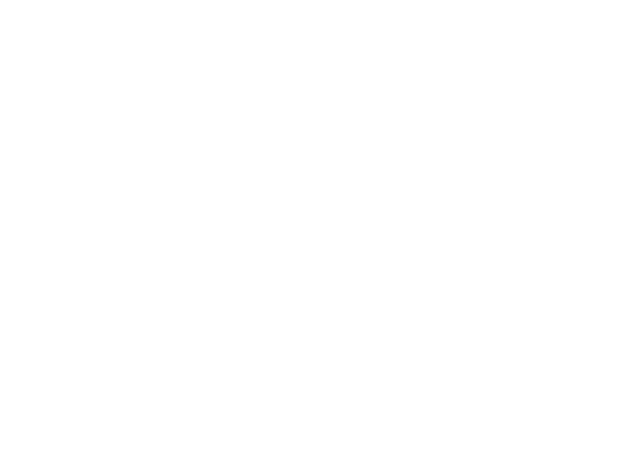

In [88]:
CHARACTER_COUNT = 26
mapping = {str(i): chr(i+65) for i in range(26)}

def generate_dataset(folder, end=None, start=0):
    if not os.path.exists(folder):
        os.makedirs(folder)
        print(f"The folder '{folder}' has been created successfully!")
    else:
        print(f"The folder '{folder}' already exists.")

    tempEnd = end
    for i in range(CHARACTER_COUNT):
        dd = letters[letters['0']==i]
        if end is None:
            tempEnd = dd.shape[0]
        for j in range(start, tempEnd):
            ddd = dd.iloc[j]
            x = ddd[1:].values
            x = x.reshape((28, 28))
            plt.axis('off')
            if not os.path.exists(f'{folder}/{mapping[str(i)]}'):
                os.makedirs(f'{folder}/{mapping[str(i)]}')
            plt.imsave(f'{folder}/{mapping[str(i)]}/{mapping[str(i)]}_{j}.jpg', x, cmap='binary')

generate_dataset('./formated')

In [62]:
#Disposition
total = letters.shape[0]
for i in range(CHARACTER_COUNT):
    dd = letters[letters['0']==i]
    ddTotal = dd.shape[0]
    print('Letter:',mapping[str(i)],' count: ',ddTotal,f' % of Total:{ddTotal/total*100:.2f}%')
print('Total:',total)

Letter: A  count:  13869  % of Total:3.72%
Letter: B  count:  8668  % of Total:2.33%
Letter: C  count:  23409  % of Total:6.29%
Letter: D  count:  10134  % of Total:2.72%
Letter: E  count:  11440  % of Total:3.07%
Letter: F  count:  1163  % of Total:0.31%
Letter: G  count:  5762  % of Total:1.55%
Letter: H  count:  7218  % of Total:1.94%
Letter: I  count:  1120  % of Total:0.30%
Letter: J  count:  8493  % of Total:2.28%
Letter: K  count:  5603  % of Total:1.50%
Letter: L  count:  11586  % of Total:3.11%
Letter: M  count:  12336  % of Total:3.31%
Letter: N  count:  19010  % of Total:5.10%
Letter: O  count:  57825  % of Total:15.53%
Letter: P  count:  19341  % of Total:5.19%
Letter: Q  count:  5812  % of Total:1.56%
Letter: R  count:  11566  % of Total:3.11%
Letter: S  count:  48419  % of Total:13.00%
Letter: T  count:  22495  % of Total:6.04%
Letter: U  count:  29008  % of Total:7.79%
Letter: V  count:  4182  % of Total:1.12%
Letter: W  count:  10784  % of Total:2.90%
Letter: X  count: 

Example of convolution


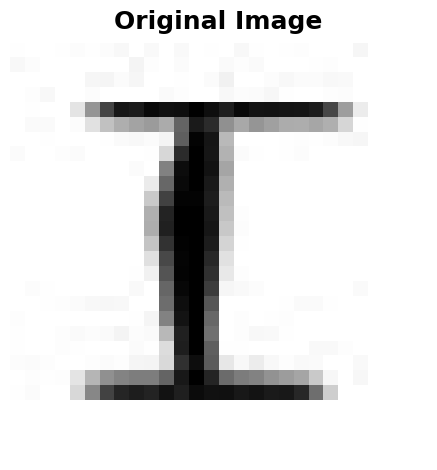

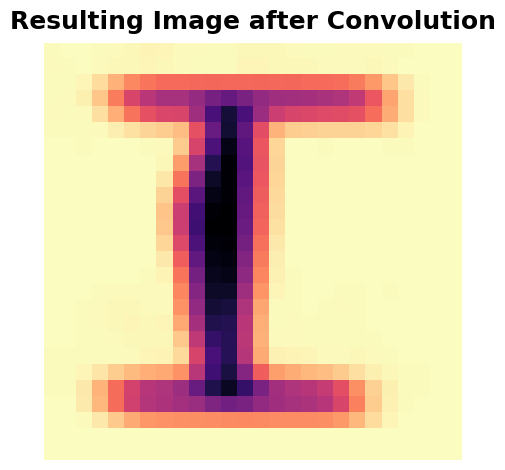

In [223]:
image_path = './formated/I/4.jpg'  # Replace 'path_to_your_image.jpg' with your image path
image = mpimg.imread(image_path)

# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert the image to a TensorFlow constant
image = np.expand_dims(image, axis=0)  # Add batch dimension
image_tensor = tf.constant(image, dtype=tf.float32)

# Define a random filter/kernel (e.g., 3x3x3x1)
filter_data = np.random.rand(3, 3, 3, 1).astype(np.float32)
filter_kernel = tf.constant(filter_data)

# Perform convolution
convolution_result = tf.nn.conv2d(input=image_tensor, filters=filter_kernel, strides=[1, 1, 1, 1], padding='VALID')

# Display the resulting image after convolution

plt.imshow(tf.squeeze(convolution_result))
plt.title('Resulting Image after Convolution')
plt.axis('off')
plt.show()

## Creating DataBlock and training model

In [105]:
(training,validation) = preprocessing.image_dataset_from_directory('./formated',image_size=(28, 28),validation_split=0.3,subset="both",seed=23)

Found 489493 files belonging to 26 classes.
Using 342646 files for training.
Using 146847 files for validation.


 Creating model and adding convolution

In [114]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3))) # Shape of image
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.Flatten()) # Performs classification
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(26)) # Classification numbers

In [115]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
 flatten_1 (Flatten)         (None, 504)              

In [117]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [126]:
history = model.fit(training, epochs=10, validation_data=validation)

Epoch 1/10
10708/10708 [==============================] - 76s 6ms/step - loss: 0.2629 - accuracy: 0.9337 - val_loss: 0.1117 - val_accuracy: 0.9677
Epoch 2/10
10708/10708 [==============================] - 59s 6ms/step - loss: 0.0955 - accuracy: 0.9735 - val_loss: 0.0927 - val_accuracy: 0.9745
Epoch 3/10
10708/10708 [==============================] - 59s 5ms/step - loss: 0.0813 - accuracy: 0.9775 - val_loss: 0.0895 - val_accuracy: 0.9756
Epoch 4/10
10708/10708 [==============================] - 59s 5ms/step - loss: 0.0743 - accuracy: 0.9798 - val_loss: 0.0879 - val_accuracy: 0.9760
Epoch 5/10
10708/10708 [==============================] - 59s 5ms/step - loss: 0.0711 - accuracy: 0.9806 - val_loss: 0.0852 - val_accuracy: 0.9793
Epoch 6/10
10708/10708 [==============================] - 58s 5ms/step - loss: 0.0699 - accuracy: 0.9812 - val_loss: 0.0907 - val_accuracy: 0.9791
Epoch 7/10
10708/10708 [==============================] - 58s 5ms/step - loss: 0.0698 - accuracy: 0.9816 - val_loss: 0

## Evaluate model


4589/4589 - 11s - loss: 0.0875 - accuracy: 0.9817 - 11s/epoch - 2ms/step


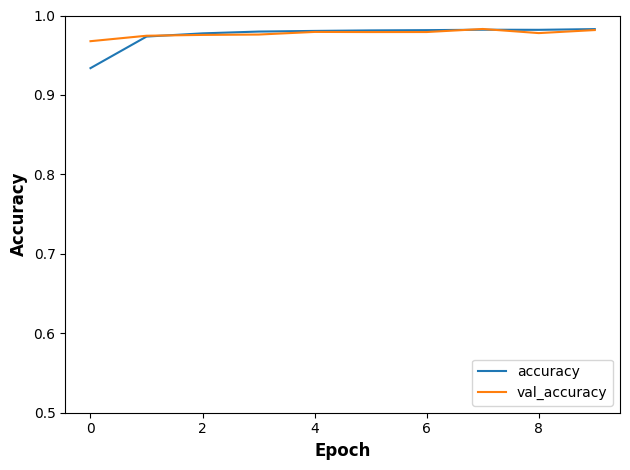

In [128]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation, verbose=2)

In [129]:
test_acc

0.9816679954528809

In [130]:
test_loss

0.08753515034914017

In [243]:
# Example of predict
image_to_test = "./formated/I/4.jpg"
result = model.predict(image_tensor)[0]
uppercase_alphabet = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
letterFound = np.argmax(result)
uppercase_alphabet[letterFound]
# result[0].index(max(result[0]))

1/1 [==============================] - 0s 19ms/step


'I'

## Saving our model


In [224]:
model.save('alfabot.keras')